<a href="https://colab.research.google.com/github/comparativechrono/Phase-oscillator-modelling-of-circadian-entrainment-in-transplanted-human-hearts/blob/main/Hearn_(2025)_Figure_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

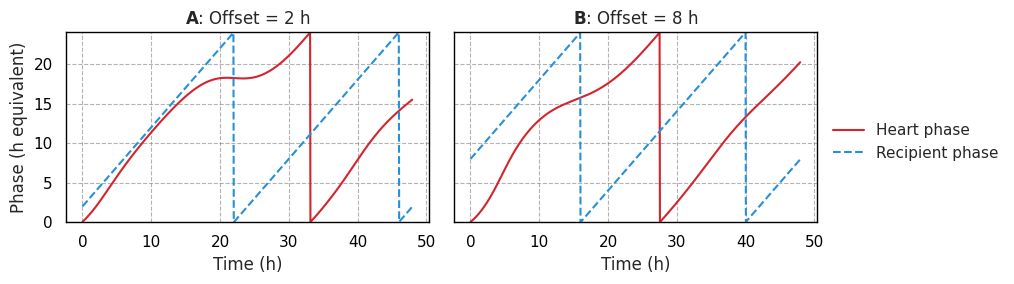

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sns


# Shared setup
omega_H = 2 * np.pi / 24.0
phase_hours = np.array([2,4,6,8,10,12,14,16,18,20,22,24])
shift_hours = np.array([1.0,2.2,2.5,2.0,1.0,-0.2,-1.5,-2.8,-3.5,-3.0,-1.0,0.2])
phase_rad = phase_hours / 24 * 2 * np.pi
shift_rad = shift_hours / 24 * 2 * np.pi
interp_func = interp1d(phase_rad, shift_rad, kind='cubic', fill_value='extrapolate')

def Z(phi):
    return interp_func(phi % (2*np.pi))

# Forced for offsets 2h and 8h
def simulate_forced(K, psi0, tmax=48, dt=0.05):
    ts = np.arange(0, tmax, dt)
    phi_H = np.zeros_like(ts)
    phi_A = np.zeros_like(ts)
    phi = 0.0
    for i, t in enumerate(ts):
        phi_A[i] = (omega_H * t + psi0) % (2*np.pi)
        phi = (phi + (omega_H + K*Z(phi)*np.sin(phi_A[i]-phi))*dt) % (2*np.pi)
        phi_H[i] = phi
    return ts, phi_H, phi_A

offsets = [2, 8]
sns.set_theme(style="whitegrid", rc={
        "grid.linestyle": "--",
        "grid.linewidth": 0.8,
        "grid.color": "gray",
        "grid.alpha": 0.6,
        "axes.edgecolor": "black",
        "axes.linewidth": 1.0,
        "xtick.color": "black",
        "ytick.color": "black",
    })

fig, axes = plt.subplots(1, len(offsets), figsize=(10,3), sharey=True)

for i, (ax, offset) in enumerate(zip(axes, offsets), start=1):
    letter = chr(ord('A') + i - 1)
    psi0 = offset/24*2*np.pi
    ts, phi_H, phi_A = simulate_forced(0.3, psi0)

    ax.plot(ts, phi_H/(2*np.pi)*24,
            color='#d2252d', label='Heart phase')
    ax.plot(ts, phi_A/(2*np.pi)*24,
            '--', color='#2890d6', label='Recipient phase')

    ax.set_title(fr"$\mathbf{{{letter}}}$: Offset = {offset} h")
    ax.set_xlabel('Time (h)')
    if i == 1:
        ax.set_ylabel('Phase (h equivalent)')
    ax.set_ylim(0,24)

handles, labels = axes[0].get_legend_handles_labels()

fig.legend(handles, labels,
           loc='center right',
           bbox_to_anchor=(1.02, 0.5),
           frameon=False)

fig.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('Figure_3.png', dpi=300, bbox_inches='tight')

plt.show()